In [1]:
%matplotlib ipympl

import pandas as pd
import seaborn as sb

# Import own code
from algorithms import *
from plot_data import *
from signal_data_class import SignalData
from interactive_trigger_class import InteractiveTrigger

sb.set()

# SN1 = "../data/SN1_Chirp_300kHzTemplate_0p16SNR_280Start_Sig.npy"
# SN2 = "../data/SN2_Chirp_300kHzTemplate_0p32SNR_280Start_Sig.npy"
# SX1 = "../data/SX1_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_99mV.npy"
# SX2 = "../data/SX2_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_132mV.npy"
# SX3 = "../data/SX3_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_264mV.npy"
# XN1 = "../data/XN1_Chirp_300kHzTemplate_0p16SNR_280Start_Noise.npy"
# XN2 = "../data/XN2_Chirp_300kHzTemplate_0p32SNR_280Start_Noise.npy"

SN3 = "../data/SN3_250Start_1msChirp_33Cycle_0p16SNR_Sig.npy"
SN4 = "../data/SN4_250Start_1msChirp_33Cycle_0p32SNR_Sig.npy"
XN3 = "../data/XN3_250Start_1msChirp_33Cycle_0p16SNR_Noise.npy"
XN4 = "../data/XN4_250Start_1msChirp_33Cycle_0p32SNR_Noise.npy"


In [2]:
data = {}

# data["SN1"] = np.array(list( zip(*np.load(SN1)) ))
# data["SN2"] = np.array(list( zip(*np.load(SN2)) ))
# data["SX1"] = np.array(list( zip(*np.load(SX1)) ))
# data["SX2"] = np.array(list( zip(*np.load(SX2)) ))
# data["SX3"] = np.array(list( zip(*np.load(SX3)) ))
# data["XN1"] = np.array(list( zip(*np.load(XN1)) ))
# data["XN2"] = np.array(list( zip(*np.load(XN2)) ))

# data["SN3"] = np.array(list( zip(*np.load(SN3)) ))
data["SN4"] = np.array(list( zip(*np.load(SN4)) ))
# data["XN3"] = np.array(list( zip(*np.load(XN3)) ))
# data["XN4"] = np.array(list( zip(*np.load(XN4)) ))


In [3]:
# Change truth data to single data-point pulses from 0 to 1

SN4_new_td = data["SN4"][2] > 0
# for i in range(2000):
#     print(int(SN4_new_td[i]), end="")


1132142352453434 <class 'numpy.float64'>
1132142352453434 <class 'numpy.float64'>


Label(value='Hitrate: 0.009615384615384616')

Label(value='Misfire rate: 0.9411764705882353')

interactive(children=(IntSlider(value=900, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

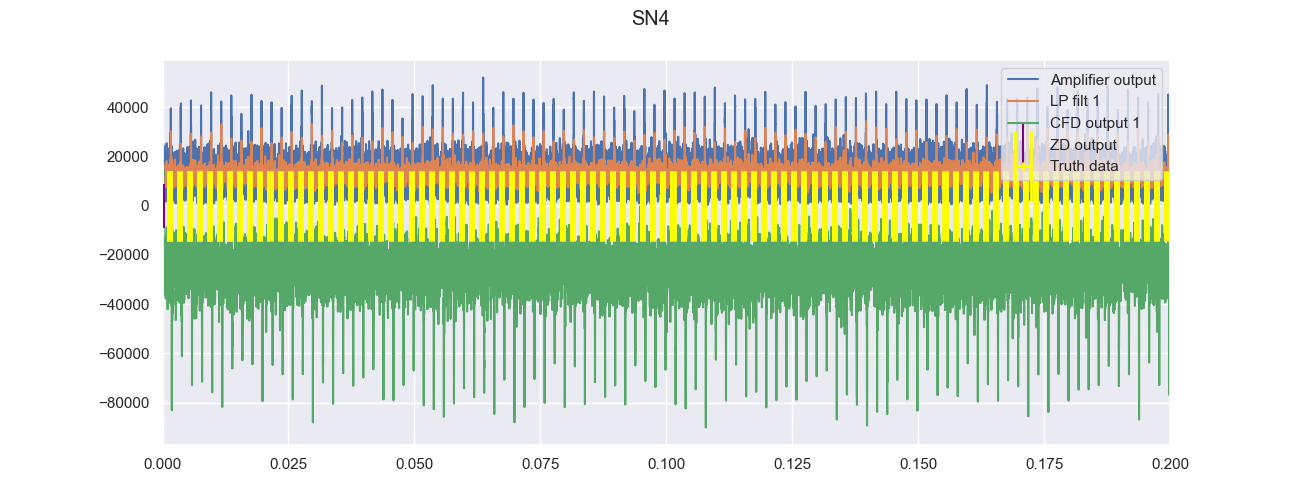

In [4]:
sigdat_SN4 = SignalData( data["SN4"][0], data["SN4"][1], truth_data = SN4_new_td)
sigdat_SN4.tolerance = 1
sigdat_SN4.section_time = 1e-3

image_SN4 = InteractiveTrigger(
        data["SN4"][0],
        data["SN4"][1],
        truth_data = SN4_new_td,
        title = "SN4",
        tolerance = 300e-6,
        slice_end = 100000,
    )
image_SN4.show()


In [5]:
# roc_datas = sigdat_SN4.get_roc_curve_data2(
#                             filter_arg_range = (20, 300 + 20, 20),
#                             inv_frac_range = (0, 8 + 0.5, 0.5),
#                             delay_samples_range = (0, 150 + 25, 25),
#                             # filter = sma_convolve_extracted,
#                             # filter_arg_name="window_width",
#                             verbose=True)

# roc_datas_pd = pd.DataFrame(roc_datas)

# roc_datas_pd.to_csv("vary_filter_roc_data.csv.temp")


## IIR filter

interactive(children=(IntSlider(value=800, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

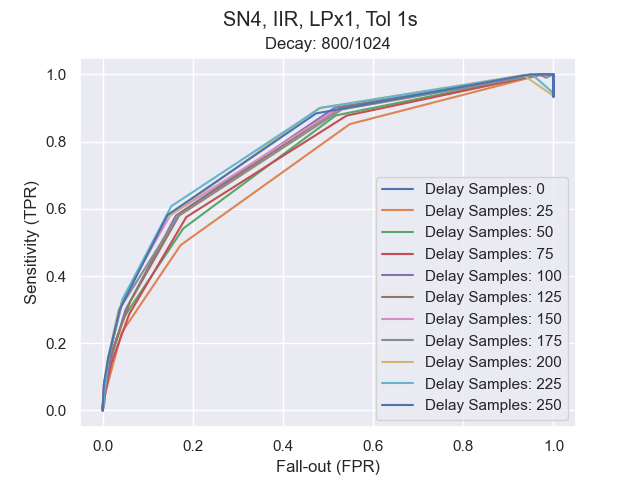

In [6]:
pd_analyse = pd.read_csv("../data/vary_filter_roc_data - SN4, IIR, LPx1, Tol 1s.csv")
plot_roc_curves_iir(pd_analyse, title="SN4, IIR, LPx1, Tol 1s")
print()


interactive(children=(IntSlider(value=900, description='Decay part / 1024', layout=Layout(width='50%'), max=10…

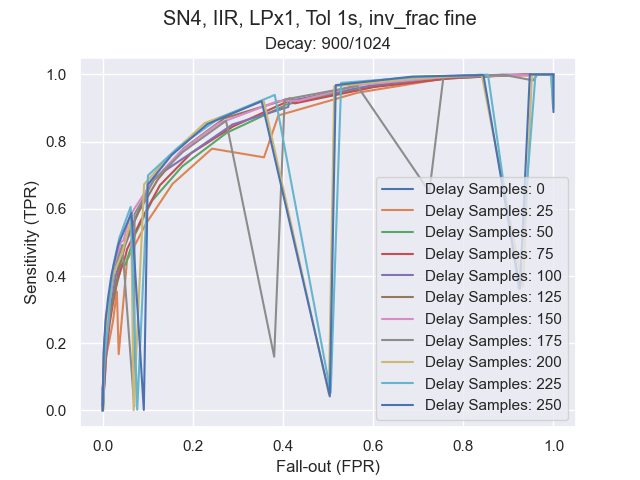

In [7]:
pd_analyse = pd.read_csv("../data/vary_filter_roc_data - SN4, IIR, LPx1, Tol 1s, inv_frac fine.csv")
plot_roc_curves_iir(pd_analyse, title="SN4, IIR, LPx1, Tol 1s, inv_frac fine")
print()


## SMA filter

In [8]:
# pd_analyse = pd.read_csv("../data/vary_filter_roc_data - SN4, SMA, LPx1, Tol 1s, window_width coarse.csv")
# plot_roc_curves_sma(pd_analyse, title="SN4, SMA, LPx1, Tol 1s, window_width coarse")
# print()


In [9]:
# pd_analyse = pd.read_csv("../data/vary_filter_roc_data - SN4, SMA, LPx1, Tol 1s, window_width fine.csv")
# plot_roc_curves_sma(pd_analyse, title="SN4, SMA, LPx1, Tol 1s, window_width fine")
# print()


interactive(children=(IntSlider(value=1, description='Window width (samples)', layout=Layout(width='50%'), max…

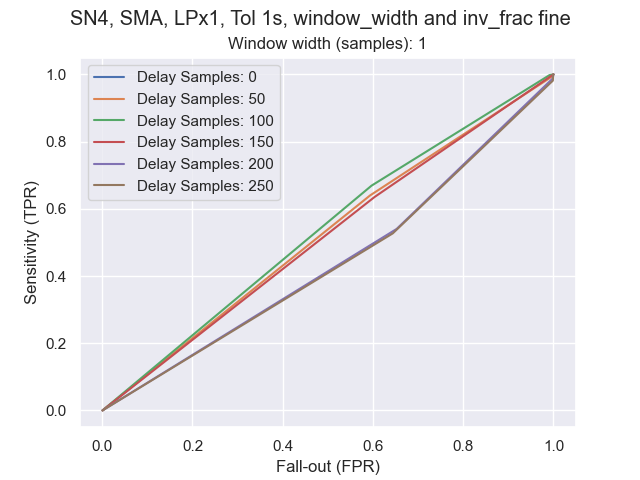

In [10]:
pd_analyse = pd.read_csv("../data/vary_filter_roc_data - SN4, SMA, LPx1, Tol 1s, window_width and inv_frac fine.csv")
plot_roc_curves_sma(pd_analyse, title="SN4, SMA, LPx1, Tol 1s, window_width and inv_frac fine")
print()
